The content of this file is combination of a hackathon code and out own experiments made over that hackathon code. There are no real results or anything only playarounds with resnet models and dataset. 

In [1]:
import h5py
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

import tensorflow as tf

import geopandas as gpd
import pandas as pd
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [ ]:

gdrive_path='/content/gdrive/MyDrive/TreeSatAI'

# This will mount your google drive under 'MyDrive'
drive.mount('/content/gdrive', force_remount=True)
# In order to access the files in this notebook we have to navigate to the correct folder
os.chdir(gdrive_path)
# Check manually if all files are present
print(sorted(os.listdir()))


Mounted at /content/gdrive
['broadleaf_beech_european beech.geojson', 'broadleaf_long-lived deciduous_cherry.geojson', 'broadleaf_long-lived deciduous_european ash.geojson', 'broadleaf_long-lived deciduous_linden.geojson', 'broadleaf_long-lived deciduous_sycamore maple.geojson', 'broadleaf_oak_english oak.geojson', 'broadleaf_oak_red oak.geojson', 'broadleaf_oak_sessile oak.geojson', 'broadleaf_short-lived deciduous_alder.geojson', 'broadleaf_short-lived deciduous_birch.geojson', 'broadleaf_short-lived deciduous_poplar.geojson', 'combined_data.geojson', 'needleleaf_douglas fir_douglas fir.geojson', 'needleleaf_fir_silver fir.geojson', 'needleleaf_larch_european larch.geojson', 'needleleaf_larch_japanese larch.geojson', 'needleleaf_pine_black pine.geojson', 'needleleaf_pine_scots pine.geojson', 'needleleaf_pine_weymouth pine.geojson', 'needleleaf_spruce_norway spruce.geojson']


## **Combined** **data**


In [ ]:
import os

geojson_folder = '/content/gdrive/MyDrive/TreeSatAI'  # GeoJSON 文件的路径

geojson_files = [f for f in os.listdir(geojson_folder) if f.endswith('.geojson')]

# 逐个读取文件
for file in geojson_files:
    file_path = os.path.join(geojson_folder, file)  # 构造完整路径
    try:
        gdf = gpd.read_file(file_path)  # 使用 GeoPandas 读取
        print(f"Successfully loaded {file}")
        print(gdf.head())  # 打印前几行内容
    except Exception as e:
        print(f"Error reading {file}: {e}")

In [ ]:
geojson_dataframes = []

for file in geojson_files:
    file_path = os.path.join(geojson_folder, file)
    try:
        gdf = gpd.read_file(file_path)
        if len(gdf) > 0:  # Only process files with valid records
            geojson_dataframes.append(gdf)
            print(f"{file}: {len(gdf)} records added.")
        else:
            print(f"{file}: No valid records found.")
    except Exception as e:
        print(f"Error processing {file}: {e}")


broadleaf_beech_european beech.geojson: 4756 records added.
broadleaf_long-lived deciduous_linden.geojson: 161 records added.
broadleaf_long-lived deciduous_cherry.geojson: 247 records added.
broadleaf_long-lived deciduous_sycamore maple.geojson: 2096 records added.
broadleaf_long-lived deciduous_european ash.geojson: 2202 records added.
broadleaf_oak_english oak.geojson: 2808 records added.
broadleaf_oak_sessile oak.geojson: 2115 records added.
broadleaf_oak_red oak.geojson: 1460 records added.
broadleaf_short-lived deciduous_alder.geojson: 2143 records added.
broadleaf_short-lived deciduous_poplar.geojson: 387 records added.
broadleaf_short-lived deciduous_birch.geojson: 2468 records added.
needleleaf_douglas fir_douglas fir.geojson: 2185 records added.
needleleaf_fir_silver fir.geojson: 811 records added.
needleleaf_larch_japanese larch.geojson: 1613 records added.
needleleaf_larch_european larch.geojson: 1139 records added.
needleleaf_pine_black pine.geojson: 412 records added.
nee

In [ ]:
for file in geojson_files:
    file_path = os.path.join(geojson_folder, file)
    gdf = gpd.read_file(file_path)
    print(f"{file}: Columns - {list(gdf.columns)}, CRS - {gdf.crs}")


broadleaf_beech_european beech.geojson: Columns - ['id', 'B11', 'B11_1', 'B11_2', 'B11_3', 'B11_4', 'B11_5', 'B11_6', 'B11_7', 'B12', 'B12_1', 'B12_2', 'B12_3', 'B12_4', 'B12_5', 'B12_6', 'B12_7', 'B2', 'B2_1', 'B2_2', 'B2_3', 'B2_4', 'B2_5', 'B2_6', 'B2_7', 'B3', 'B3_1', 'B3_2', 'B3_3', 'B3_4', 'B3_5', 'B3_6', 'B3_7', 'B4', 'B4_1', 'B4_2', 'B4_3', 'B4_4', 'B4_5', 'B4_6', 'B4_7', 'B5', 'B5_1', 'B5_2', 'B5_3', 'B5_4', 'B5_5', 'B5_6', 'B5_7', 'B6', 'B6_1', 'B6_2', 'B6_3', 'B6_4', 'B6_5', 'B6_6', 'B6_7', 'B7', 'B7_1', 'B7_2', 'B7_3', 'B7_4', 'B7_5', 'B7_6', 'B7_7', 'B8', 'B8A', 'B8A_1', 'B8A_2', 'B8A_3', 'B8A_4', 'B8A_5', 'B8A_6', 'B8A_7', 'B8_1', 'B8_2', 'B8_3', 'B8_4', 'B8_5', 'B8_6', 'B8_7', 'EVI', 'EVI2', 'EVI2_1', 'EVI2_2', 'EVI2_3', 'EVI2_4', 'EVI2_5', 'EVI2_6', 'EVI2_7', 'EVI_1', 'EVI_2', 'EVI_3', 'EVI_4', 'EVI_5', 'EVI_6', 'EVI_7', 'NDVI', 'NDVI_1', 'NDVI_2', 'NDVI_3', 'NDVI_4', 'NDVI_5', 'NDVI_6', 'NDVI_7', 'NDWI', 'NDWI_1', 'NDWI_2', 'NDWI_3', 'NDWI_4', 'NDWI_5', 'NDWI_6', 'NDWI

In [ ]:
# Stroge all GeoDataFrame
geojson_dataframes = []

# Read and store data for each GeoJSON file one by one
for file in geojson_files:
    file_path = os.path.join(geojson_folder, file)
    gdf = gpd.read_file(file_path)
    geojson_dataframes.append(gdf)
    print(f"Loaded {file} with {len(gdf)} records.")

# Combine all GeoDataFrame
combined_gdf = gpd.GeoDataFrame(pd.concat(geojson_dataframes, ignore_index=True))

# Check the merged data
print(f"Combined GeoDataFrame has {len(combined_gdf)} records.")



Loaded broadleaf_beech_european beech.geojson with 4756 records.
Loaded broadleaf_long-lived deciduous_linden.geojson with 161 records.
Loaded broadleaf_long-lived deciduous_cherry.geojson with 247 records.
Loaded broadleaf_long-lived deciduous_sycamore maple.geojson with 2096 records.
Loaded broadleaf_long-lived deciduous_european ash.geojson with 2202 records.
Loaded broadleaf_oak_english oak.geojson with 2808 records.
Loaded broadleaf_oak_sessile oak.geojson with 2115 records.
Loaded broadleaf_oak_red oak.geojson with 1460 records.
Loaded broadleaf_short-lived deciduous_alder.geojson with 2143 records.
Loaded broadleaf_short-lived deciduous_poplar.geojson with 387 records.
Loaded broadleaf_short-lived deciduous_birch.geojson with 2468 records.
Loaded needleleaf_douglas fir_douglas fir.geojson with 2185 records.
Loaded needleleaf_fir_silver fir.geojson with 811 records.
Loaded needleleaf_larch_japanese larch.geojson with 1613 records.
Loaded needleleaf_larch_european larch.geojson wi

In [14]:
# Save to Google Drive
output_path = os.path.join(geojson_folder, "combined_data.geojson")
combined_gdf.to_file(output_path, driver="GeoJSON")
print(f"Combined GeoJSON saved to {output_path}")


NameError: name 'os' is not defined

# **Read Combined data**

In [1]:
import geopandas as gpd
import h5py
import numpy as np
import ast

import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import svm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:

input_file = "data/combined_data.geojson"
## Read combined data
combined_gdf = gpd.read_file(input_file)

In [3]:
print(combined_gdf.head())
print(combined_gdf.crs)
print(combined_gdf.columns.to_list())


                     id                                                B11  \
0  0000000000000000050b  [ [ 0.23570001125335693, 0.23570001125335693, ...   
1  0000000000000000050c  [ [ 0.31589999794960022, 0.31589999794960022, ...   
2  0000000000000000050d  [ [ 0.19909998774528503, 0.18310000002384186, ...   
3  0000000000000000050e  [ [ 0.22779999673366547, 0.22419999539852142, ...   
4  0000000000000000050f  [ [ 0.25600001215934753, 0.26150000095367432, ...   

                                               B11_1  \
0                                               None   
1  [ [ 0.33454999327659607, 0.33454999327659607, ...   
2  [ [ 0.25055000185966492, 0.2463500052690506, 0...   
3  [ [ 0.26010000705718994, 0.25749999284744263, ...   
4  [ [ 0.28685000538825989, 0.29079997539520264, ...   

                                               B11_2  \
0  [ [ 0.25260001420974731, 0.25260001420974731, ...   
1  [ [ 0.36035001277923584, 0.36035001277923584, ...   
2  [ [ 0.33680000901222229

In [4]:
def flattenDf(df,col):
  #  flatten 5*5 matrix col in df and return a new df which include col_1~col_25
  flattened_df = pd.DataFrame(
      df[col].apply(lambda x: x.flatten()).tolist(),
      columns=[f'{col}_{i+1}' for i in range(25)]
  )
  df_new = pd.concat([df, flattened_df], axis=1)
  df_new = df_new.drop(columns=[col])
  return df_new

In [5]:
# for now, we just select the NDVI, and keep id&species
select_col = ['l3_species','NDVI', 'NDVI_1', 'NDVI_2', 'NDVI_3', 'NDVI_4', 'NDVI_5', 'NDVI_6', 'NDVI_7']

select_df = combined_gdf[select_col]

In [6]:
select_df.shape

(37907, 9)

In [7]:
print(select_df.isnull().sum())

l3_species       0
NDVI             0
NDVI_1        5483
NDVI_2         133
NDVI_3           3
NDVI_4        3535
NDVI_5           0
NDVI_6        2861
NDVI_7        3779
dtype: int64


In [21]:
import ast
def flattenDf_str(df,col):
  #  flatten 5*5 matrix(string) col in df and return a new df which include col_1~col_25

  flattened_df = pd.DataFrame(
      df[col].apply(lambda x: np.array(ast.literal_eval(x)).flatten()).tolist(),
      columns=[f'new{col}_{i+1}' for i in range(25)]
  )
  df_new = pd.concat([df, flattened_df], axis=1)
  df_new = df_new.drop(columns=[col])
  return df_new

In [22]:
# for now we just dorp the None
clean_select_df = select_df.dropna().reset_index(drop=True)
print(clean_select_df.shape)
print(clean_select_df.isnull().any())

(26268, 9)
l3_species    False
NDVI          False
NDVI_1        False
NDVI_2        False
NDVI_3        False
NDVI_4        False
NDVI_5        False
NDVI_6        False
NDVI_7        False
dtype: bool


In [23]:
for col in select_col[2:]:
  print(col)
  clean_select_df = flattenDf_str(clean_select_df,col)
  print(clean_select_df.shape)

NDVI_1
(26268, 33)
NDVI_2
(26268, 57)
NDVI_3
(26268, 81)
NDVI_4
(26268, 105)
NDVI_5
(26268, 129)
NDVI_6
(26268, 153)
NDVI_7
(26268, 177)


In [24]:
clean_select_df.dtypes

l3_species       object
NDVI             object
newNDVI_1_1     float64
newNDVI_1_2     float64
newNDVI_1_3     float64
                 ...   
newNDVI_7_21    float64
newNDVI_7_22    float64
newNDVI_7_23    float64
newNDVI_7_24    float64
newNDVI_7_25    float64
Length: 177, dtype: object

In [25]:
labels_raw = np.array(clean_select_df['l3_species'])
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
labels = encoder.fit_transform(labels_raw.reshape(-1, 1))
#print("Labels shape: " + str(labels.shape))
#print("\nFirst 19 rows:")
print(labels[:19])

print("Unique species in first 19 samples:")
print(clean_select_df['l3_species'][:19].unique())

print("\nAll unique species:")
print(clean_select_df['l3_species'].unique())

print("\nSpecies distribution:")
print(clean_select_df['l3_species'].value_counts())

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.

In [26]:
shuffled_df = clean_select_df.sample(frac=1, random_state=42).reset_index(drop=True)

# 重新进行独热编码
labels_raw = np.array(shuffled_df['l3_species'])
encoder = OneHotEncoder(sparse_output=False)
labels = encoder.fit_transform(labels_raw.reshape(-1, 1))

print("Labels shape: " + str(labels.shape))
print("\nFirst 19 rows:")
print(labels[:19])

Labels shape: (26268, 19)

First 19 rows:
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [27]:
class_sample = np.argmax(labels, axis=0)
print(class_sample)

[  0  25  10 252  21   2   3  17  54  19 441  22  41   1  11   4  12  28
  43]


In [28]:
# reshape data to a 4d
flatten_cols = [c for c in clean_select_df.columns if c.startswith('newNDVI_')]
arr_2d = clean_select_df[flatten_cols].to_numpy()
list_of_arrays = [row for row in arr_2d]       # This is a list of length n
tuple_of_arrays = tuple(arr_2d)                # This is a tuple of length n
#print(list_of_arrays)
#print(tuple_of_arrays)
arr_4d = arr_2d.reshape(-1, 7, 5, 5)
print(arr_4d.shape)

(26268, 7, 5, 5)


In [29]:
df_NDVI = clean_select_df
grouped = df_NDVI.groupby('l3_species')

In [30]:
i =0
for species, group in grouped:
    print(f"Species: {species}")
    i+=1
    print(i)

Species: alder
1
Species: birch
2
Species: black pine
3
Species: cherry
4
Species: douglas fir
5
Species: english oak
6
Species: european ash
7
Species: european beech
8
Species: european larch
9
Species: japanese larch
10
Species: linden
11
Species: norway spruce
12
Species: poplar
13
Species: red oak
14
Species: scots pine
15
Species: sessile oak
16
Species: silver fir
17
Species: sycamore maple
18
Species: weymouth pine
19


# **# Model**

In [31]:
X = arr_4d
Y = labels
print(X.shape)
print(Y.shape)

(26268, 7, 5, 5)
(26268, 19)


Epoch 1/50


c:\Users\berky\.conda\envs\dseo\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


653/657 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1002 - loss: 5.6158
Epoch 1: val_accuracy improved from -inf to 0.17472, saving model to best_model.keras
657/657 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.1003 - loss: 5.6064 - val_accuracy: 0.1747 - val_loss: 3.0605 - learning_rate: 0.0010
Epoch 2/50
654/657 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1290 - loss: 3.1087
Epoch 2: val_accuracy did not improve from 0.17472
657/657 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1291 - loss: 3.1083 - val_accuracy: 0.1747 - val_loss: 2.8907 - learning_rate: 0.0010
Epoch 3/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1496 - loss: 2.9323
Epoch 3: val_accuracy did not improve from 0.17472
657/657 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1496 - loss: 2.9323 - val_accuracy: 0.1745 - val_loss: 2.8397 - learning_rate: 0.0010
Epoch 4/50
650/657 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1557 - loss: 2.8615
Epoch 4: val_accuracy did not improve from 0.17472
657/6

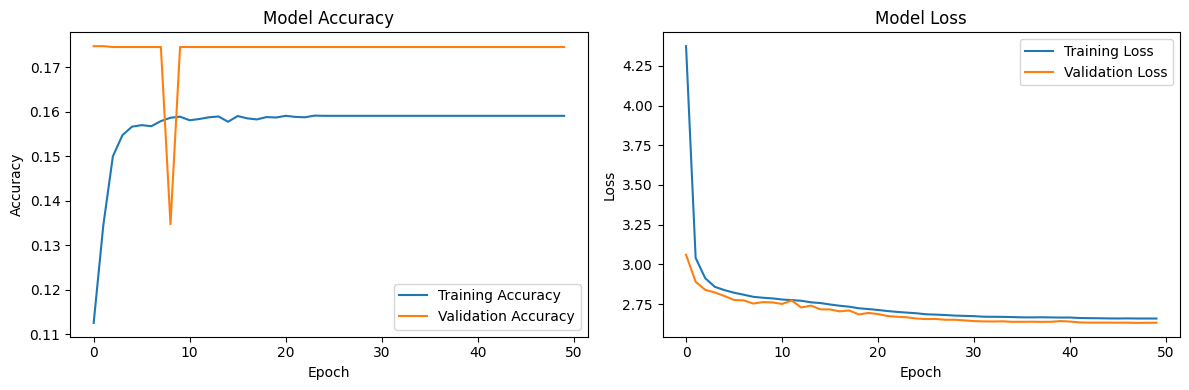


Final Training Accuracy: 0.1622


In [32]:
#CNN Model
import tensorflow as tf

# 构建改进后的模型
model = tf.keras.Sequential([
    # 第一个卷积块
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', input_shape=(7, 5, 5)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.4),  # 增加dropout比例

    # 第二个卷积块
    tf.keras.layers.Conv2D(64, (3, 3), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.4),

    # 展平层
    tf.keras.layers.Flatten(),

    # 全连接层
    tf.keras.layers.Dense(128,
                         kernel_regularizer=tf.keras.regularizers.l2(0.02),  # 增加L2正则化强度
                         bias_regularizer=tf.keras.regularizers.l2(0.02)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),

    # 输出层
    tf.keras.layers.Dense(19, activation='softmax')
])

# 编译模型
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 回调函数
callbacks = [
    # 早停
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=7,
        restore_best_weights=True,
        verbose=1
    ),

    # 学习率衰减
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=0.00001,
        verbose=1
    ),

    # 模型检查点
    tf.keras.callbacks.ModelCheckpoint(
       'best_model.keras',  # Changed from 'best_model.h5'
       monitor='val_accuracy',
       save_best_only=True,
       verbose=1
   )
]

# 训练模型
history = model.fit(
    X, Y,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

# 绘制训练过程
import matplotlib.pyplot as plt

def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # 绘制准确率
    ax1.plot(history.history['accuracy'], label='Training Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()

    # 绘制损失
    ax2.plot(history.history['loss'], label='Training Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()

    plt.tight_layout()
    plt.show()

# 绘制训练历史
plot_training_history(history)

# 评估最终模型
final_train_loss, final_train_accuracy = model.evaluate(X, Y, verbose=0)
print(f"\nFinal Training Accuracy: {final_train_accuracy:.4f}")

In [33]:
# 1. 构建简化的模型
def build_model():
   model = tf.keras.Sequential([
       # 第一个卷积块 - 简化的特征提取
       tf.keras.layers.Conv2D(16, (3, 3), padding='same', input_shape=(7, 5, 5)),
       tf.keras.layers.BatchNormalization(),
       tf.keras.layers.Activation('relu'),
       tf.keras.layers.Dropout(0.5),

       # 第二个卷积块
       tf.keras.layers.Conv2D(32, (3, 3), padding='same'),
       tf.keras.layers.BatchNormalization(),
       tf.keras.layers.Activation('relu'),
       tf.keras.layers.Dropout(0.5),

       # 展平
       tf.keras.layers.Flatten(),

       # 带强正则化的全连接层
       tf.keras.layers.Dense(64,
                           kernel_regularizer=tf.keras.regularizers.l2(0.05),
                           bias_regularizer=tf.keras.regularizers.l2(0.05)),
       tf.keras.layers.BatchNormalization(),
       tf.keras.layers.Activation('relu'),
       tf.keras.layers.Dropout(0.5),

       # 输出层
       tf.keras.layers.Dense(19, activation='softmax')
   ])
   return model

# 2. 配置训练参数和回调函数
def get_callbacks():
   return [
       # 早停
       tf.keras.callbacks.EarlyStopping(
           monitor='val_loss',
           patience=8,
           restore_best_weights=True,
           verbose=1
       ),
       # 学习率调度
       tf.keras.callbacks.ReduceLROnPlateau(
           monitor='val_loss',
           factor=0.2,
           patience=3,
           min_lr=0.00001,
           verbose=1
       ),
       # 保存最佳模型
       tf.keras.callbacks.ModelCheckpoint(
           'best_model.h5',
           monitor='val_accuracy',
           save_best_only=True,
           verbose=1
       )
   ]

# 3. 训练函数
def train_model(X, Y):
   # 构建模型
   model = build_model()

   # 配置优化器
   optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)

   # 编译模型
   model.compile(
       optimizer=optimizer,
       loss='categorical_crossentropy',
       metrics=['accuracy']
   )

   # 获取回调函数
   callbacks = get_callbacks()

   # 训练模型
   history = model.fit(
       X, Y,
       epochs=50,
       batch_size=32,
       validation_split=0.2,
       callbacks=callbacks,
       verbose=1
   )

   return model, history

# 4. 可视化训练过程
def plot_training_history(history):
   import matplotlib.pyplot as plt

   fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

   # 绘制准确率
   ax1.plot(history.history['accuracy'], label='Training Accuracy')
   ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
   ax1.set_title('Model Accuracy')
   ax1.set_xlabel('Epoch')
   ax1.set_ylabel('Accuracy')
   ax1.legend()
   ax1.grid(True)

   # 绘制损失
   ax2.plot(history.history['loss'], label='Training Loss')
   ax2.plot(history.history['val_loss'], label='Validation Loss')
   ax2.set_title('Model Loss')
   ax2.set_xlabel('Epoch')
   ax2.set_ylabel('Loss')
   ax2.legend()
   ax2.grid(True)

   plt.tight_layout()
   plt.show()

# 5. 评估模型性能
def evaluate_model(model, X, Y):
   # 在训练集上评估
   train_loss, train_accuracy = model.evaluate(X, Y, verbose=0)
   print(f"\nFinal Training Accuracy: {train_accuracy:.4f}")
   print(f"Final Training Loss: {train_loss:.4f}")

# 主程序
if __name__ == "__main__":
   # 假设X和Y已经准备好了
   # 训练模型
   model, history = train_model(X, Y)

   # 绘制训练历史
   plot_training_history(history)

   # 评估模型
   evaluate_model(model, X, Y)

   # 保存最终模型
   model.save('final_model.h5')



ValueError: The filepath provided must end in `.keras` (Keras model format). Received: filepath=best_model.h5

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
# 1. Flatten 特征，把 (26268, 7, 5, 5) 变成 (26268, 175)
n_samples = X.shape[0]
X_flat = X.reshape(n_samples, -1)  # -1 让 numpy 自动计算 7*5*5=175

print("X_flat shape:", X_flat.shape)  # (26268, 175)
print("Y shape:", Y.shape)           # (26268, 19)

# 2. 训练集 / 测试集 切分
X_train, X_test, Y_train, Y_test = train_test_split(
    X_flat, Y, test_size=0.2, random_state=42
)

# 3. 建立 Random Forest Regressor
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1  # 并行加速，可选
)

# 4. 训练模型
rf.fit(X_train, Y_train)

# 5. 预测
Y_pred = rf.predict(X_test)

# 6. 评价回归效果 (多输出时按行逐一计算)
mse = mean_squared_error(Y_test, Y_pred, multioutput='raw_values')
r2  = r2_score(Y_test, Y_pred, multioutput='uniform_average')

print("MSE (each output dimension):", mse)
print("R^2 (averaged across outputs):", r2)

X_flat shape: (26268, 175)
Y shape: (26268, 19)


KeyboardInterrupt: 

# **data** **cleaning**

In [36]:
Clean_data = combined_gdf

# 检查数据前几行以了解结构
#print(Clean_data.head())

# 检查数据类型
print(Clean_data.dtypes)

# 检查是否有缺失值
print(Clean_data.isnull().sum())


id                 object
B11                object
B11_1              object
B11_2              object
B11_3              object
                   ...   
SAVI_7             object
l1_leaf_types      object
l2_genus           object
l3_species         object
geometry         geometry
Length: 125, dtype: object
id                  0
B11                 0
B11_1            5483
B11_2             133
B11_3               3
                 ... 
SAVI_7           3779
l1_leaf_types       0
l2_genus            0
l3_species          0
geometry            0
Length: 125, dtype: int64


In [37]:
#missing data
Clean_data=Clean_data.dropna().reset_index(drop=True)

In [ ]:
#outliner
from scipy import stats
feature=['id', 'B11', 'B11_1', 'B11_2', 'B11_3', 'B11_4', 'B11_5', 'B11_6', 'B11_7', 'B12', 'B12_1', 'B12_2', 'B12_3', 'B12_4', 'B12_5', 'B12_6', 'B12_7', 'B2', 'B2_1', 'B2_2', 'B2_3', 'B2_4', 'B2_5', 'B2_6', 'B2_7', 'B3', 'B3_1', 'B3_2', 'B3_3', 'B3_4', 'B3_5', 'B3_6', 'B3_7', 'B4', 'B4_1', 'B4_2', 'B4_3', 'B4_4', 'B4_5', 'B4_6', 'B4_7', 'B5', 'B5_1', 'B5_2', 'B5_3', 'B5_4', 'B5_5', 'B5_6', 'B5_7', 'B6', 'B6_1', 'B6_2', 'B6_3', 'B6_4', 'B6_5', 'B6_6', 'B6_7', 'B7', 'B7_1', 'B7_2', 'B7_3', 'B7_4', 'B7_5', 'B7_6', 'B7_7', 'B8', 'B8A', 'B8A_1', 'B8A_2', 'B8A_3', 'B8A_4', 'B8A_5', 'B8A_6', 'B8A_7', 'B8_1', 'B8_2', 'B8_3', 'B8_4', 'B8_5', 'B8_6', 'B8_7', 'EVI', 'EVI2', 'EVI2_1', 'EVI2_2', 'EVI2_3', 'EVI2_4', 'EVI2_5', 'EVI2_6', 'EVI2_7', 'EVI_1', 'EVI_2', 'EVI_3', 'EVI_4', 'EVI_5', 'EVI_6', 'EVI_7', 'NDVI', 'NDVI_1', 'NDVI_2', 'NDVI_3', 'NDVI_4', 'NDVI_5', 'NDVI_6', 'NDVI_7', 'NDWI', 'NDWI_1', 'NDWI_2', 'NDWI_3', 'NDWI_4', 'NDWI_5', 'NDWI_6', 'NDWI_7', 'SAVI', 'SAVI_1', 'SAVI_2', 'SAVI_3', 'SAVI_4', 'SAVI_5', 'SAVI_6', 'SAVI_7', 'l1_leaf_types', 'l2_genus', 'l3_species', 'geometry']

# 假设 data 是你的DataFrame，'feature' 是需要处理的特征列
z_scores = stats.zscore(Clean_data[feature])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)  # 保留Z-score小于3的数据点
Clean_data = Clean_data[filtered_entries]

In [ ]:
spectral_bands = ['B11', 'B11_1', 'B11_2', 'B11_3', 'B11_4', 'B11_5', 'B11_6', 'B11_7', 'B12', 'B12_1', 'B12_2', 'B12_3', 'B12_4', 'B12_5', 'B12_6', 'B12_7', 'B2', 'B2_1', 'B2_2', 'B2_3', 'B2_4', 'B2_5', 'B2_6', 'B2_7', 'B3', 'B3_1', 'B3_2', 'B3_3', 'B3_4', 'B3_5', 'B3_6', 'B3_7', 'B4', 'B4_1', 'B4_2', 'B4_3', 'B4_4', 'B4_5', 'B4_6', 'B4_7', 'B5', 'B5_1', 'B5_2', 'B5_3', 'B5_4', 'B5_5', 'B5_6', 'B5_7', 'B6', 'B6_1', 'B6_2', 'B6_3', 'B6_4', 'B6_5', 'B6_6', 'B6_7', 'B7', 'B7_1', 'B7_2', 'B7_3', 'B7_4', 'B7_5', 'B7_6', 'B7_7', 'B8', 'B8A', 'B8A_1', 'B8A_2', 'B8A_3', 'B8A_4', 'B8A_5', 'B8A_6', 'B8A_7', 'B8_1', 'B8_2', 'B8_3', 'B8_4', 'B8_5', 'B8_6', 'B8_7']
missing_values = combined_gdf[spectral_bands].isnull().sum()
print("缺失值数量：")
print(missing_values)

# 查看缺失值的比例
missing_percentage = (missing_values / len(combined_gdf)) * 100
print("\n缺失值比例（%）：")
print(missing_percentage)

data_cleaned_bands = combined_gdf.dropna(subset=spectral_bands)
print(data_cleaned_bands.shape)

# **Visualization**


**box plot**: the relationship between NDVI

In [ ]:
df_NDVI.columns

Index(['l3_species', 'NDVI', 'newNDVI_1_1', 'newNDVI_1_2', 'newNDVI_1_3',
       'newNDVI_1_4', 'newNDVI_1_5', 'newNDVI_1_6', 'newNDVI_1_7',
       'newNDVI_1_8',
       ...
       'newSAVI_7_16', 'newSAVI_7_17', 'newSAVI_7_18', 'newSAVI_7_19',
       'newSAVI_7_20', 'newSAVI_7_21', 'newSAVI_7_22', 'newSAVI_7_23',
       'newSAVI_7_24', 'newSAVI_7_25'],
      dtype='object', length=977)

<ipython-input-93-ef08b1ca78d3>:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=90)
<ipython-input-93-ef08b1ca78d3>:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=90)
<ipython-input-93-ef08b1ca78d3>:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=90)
<ipython-input-93-ef08b1ca78d3>:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=90)
<ipython-input-93-ef08b1ca78d3>:24: UserWarning: set_ticklabels(

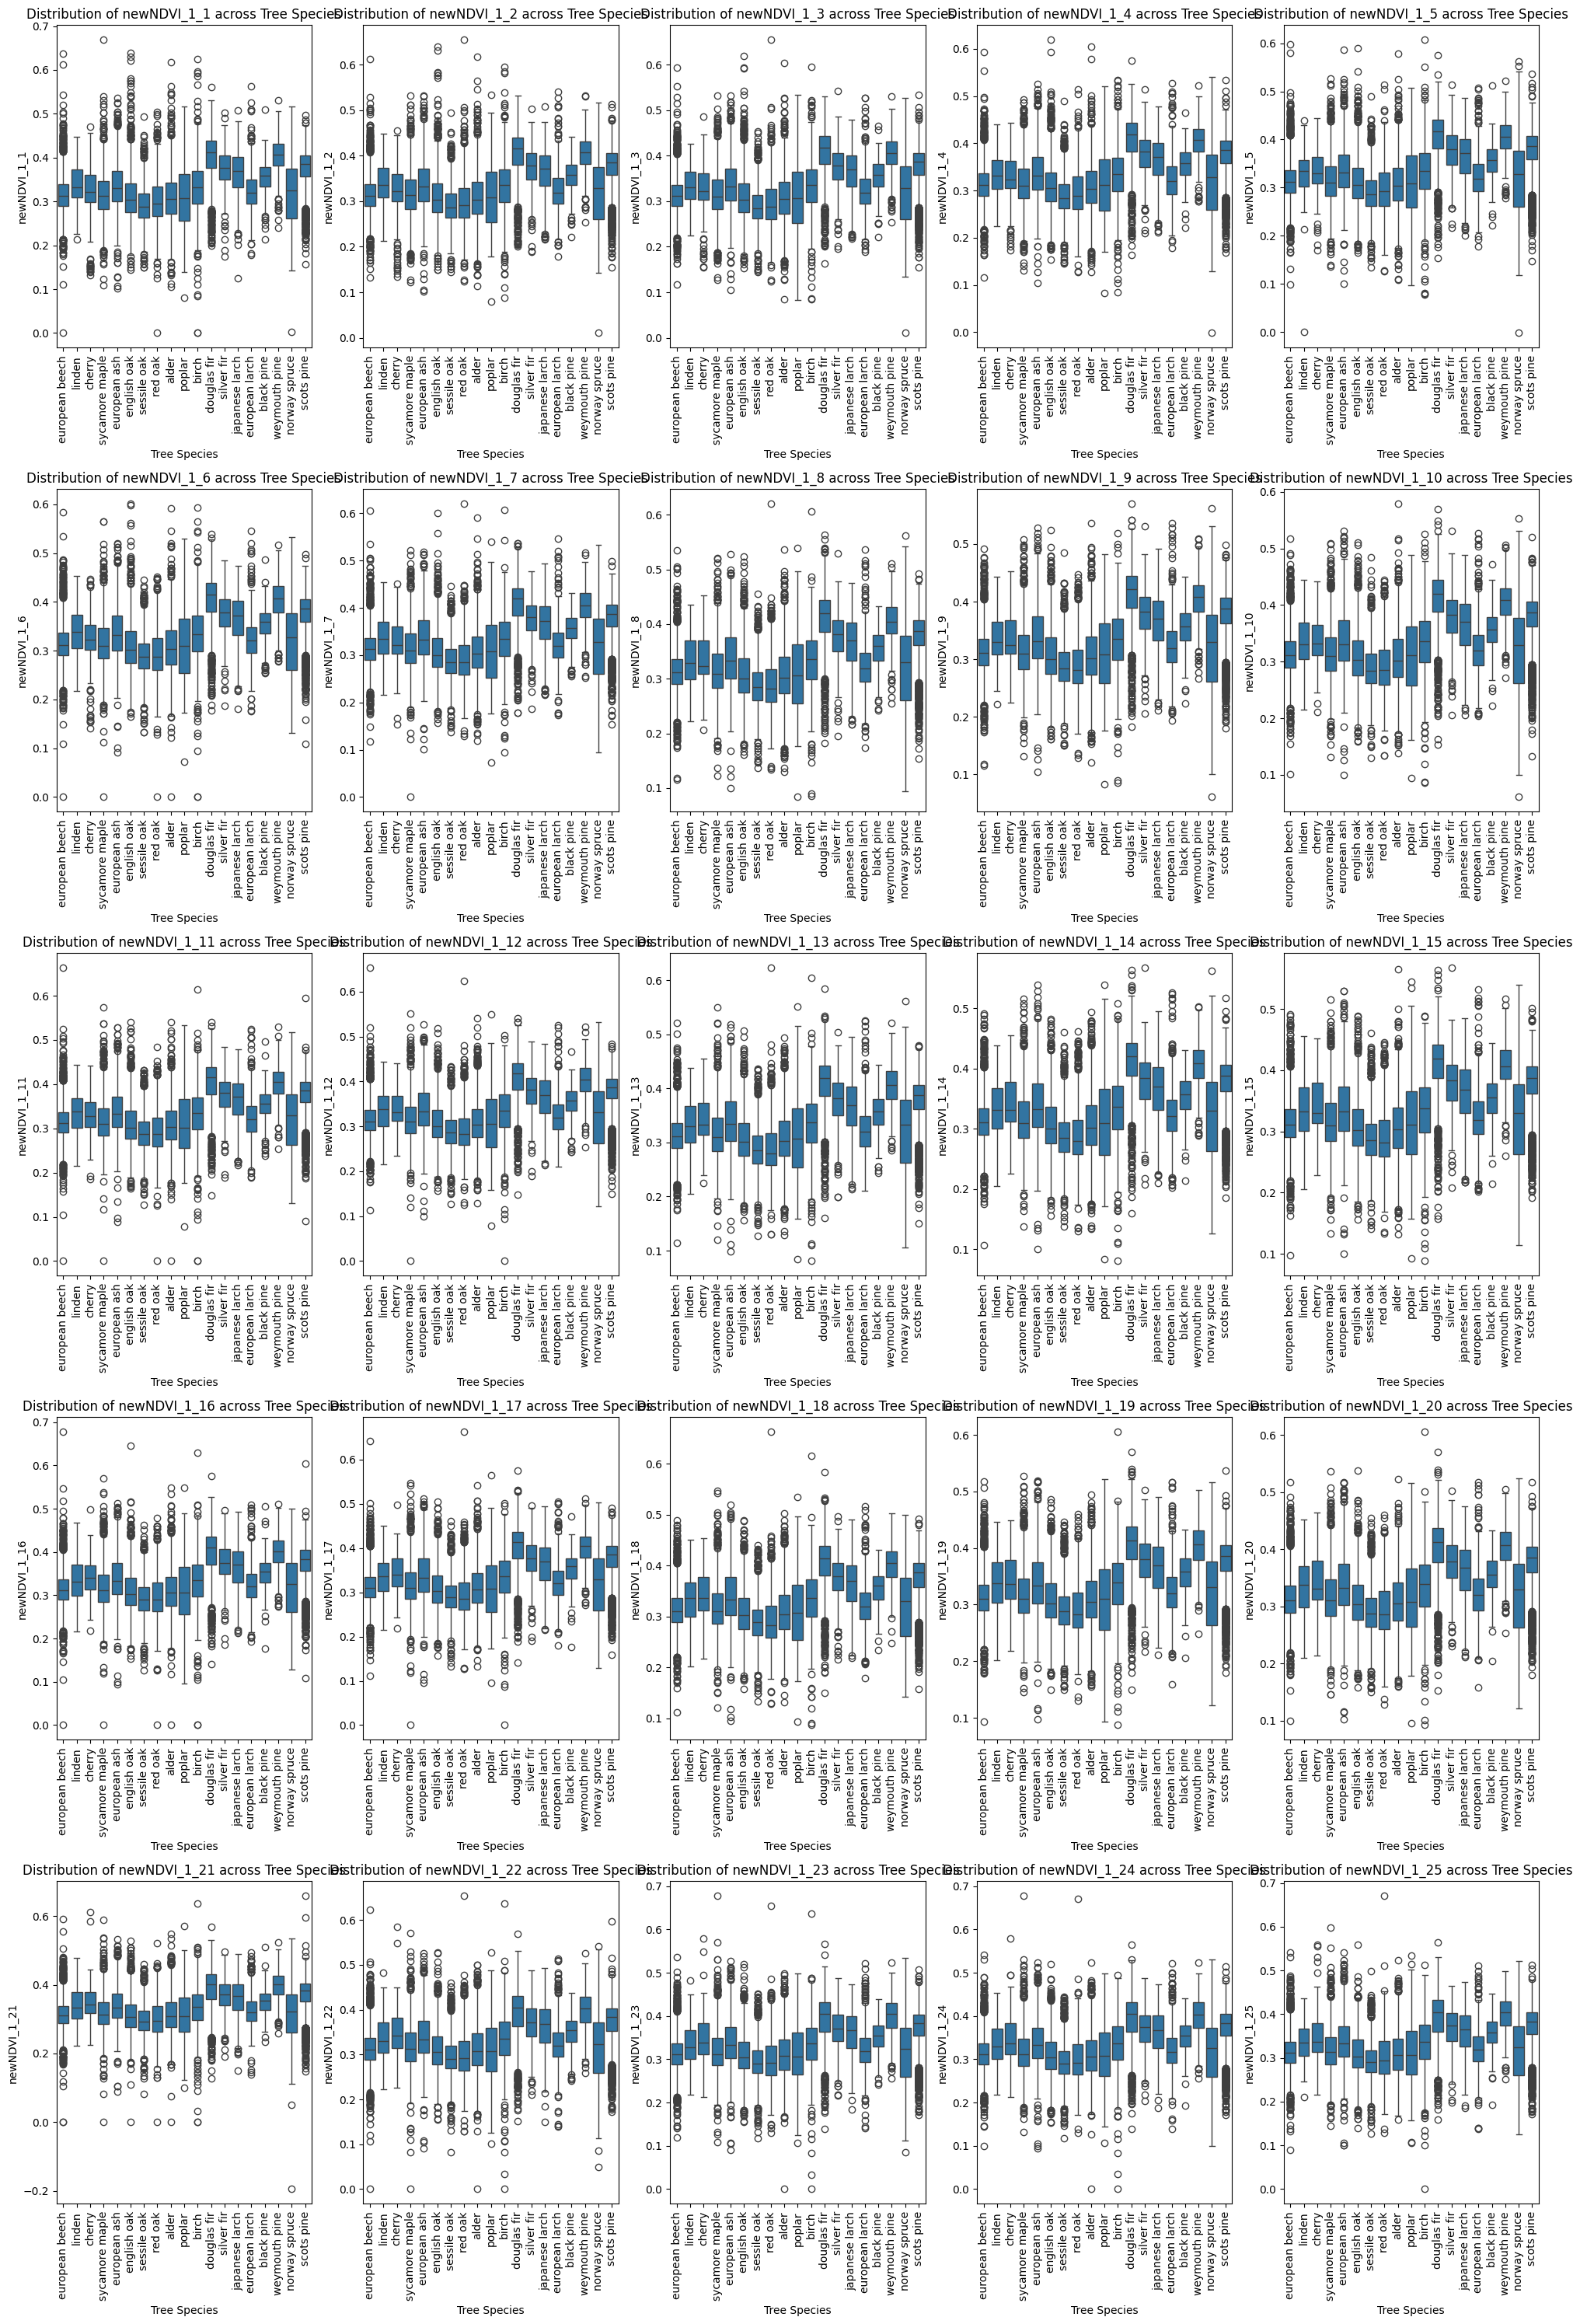

In [ ]:
import seaborn as sns
# # 保留需要用于分组的分类列
# category_col = df_NDVI['l3_species']
# numeric_cols = df_NDVI[['newNDVI_2_2']]
# # 选择数值列进行聚合
# Vis_data = numeric_cols.groupby(category_col)['newNDVI_2_2'].mean().reset_index()

# print(Vis_data.columns)

# 使用Vis_data绘图

ndvi_columns = [col for col in df_NDVI.columns if 'newNDVI_1' in col]
# 计算需要的行数和列数
n_plots = len(ndvi_columns)
n_cols = 5  # 每行3个图
n_rows = int(np.ceil(n_plots / n_cols))

# 创建子图
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6*n_rows))
axes = axes.flatten()  # 将二维数组转为一维，便于遍历

for idx, ndvi_col in enumerate(ndvi_columns):
    sns.boxplot(x='l3_species', y=ndvi_col, data=df_NDVI, ax=axes[idx])
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=90)
    axes[idx].set_title(f'Distribution of {ndvi_col} across Tree Species')
    axes[idx].set_xlabel('Tree Species')
    axes[idx].set_ylabel(ndvi_col)

# 如果子图数量不能被3整除，删除多余的空白子图
for idx in range(n_plots, len(axes)):
    fig.delaxes(axes[idx])

# 调整布局
plt.tight_layout()
plt.show()




In [ ]:
# 1. ANOVA
print("Available columns in df:", df.columns)
select_data_cleaned_bands = data_cleaned_bands['B11']
anova_results = {}
for band in select_data_cleaned_bands:
    groups = [group for _, group in df.groupby('l3_species')[band]]
    f_value, p_value = stats.f_oneway(*groups)
    anova_results[band] = {'F-value': f_value, 'p-value': p_value}

anova_df = pd.DataFrame(anova_results).T
print("ANOVA Results:")
print(anova_df)

Available columns in df: Index(['l3_species', 'NDVI', 'newNDVI_1_1', 'newNDVI_1_2', 'newNDVI_1_3',
       'newNDVI_1_4', 'newNDVI_1_5', 'newNDVI_1_6', 'newNDVI_1_7',
       'newNDVI_1_8',
       ...
       'newNDVI_7_16', 'newNDVI_7_17', 'newNDVI_7_18', 'newNDVI_7_19',
       'newNDVI_7_20', 'newNDVI_7_21', 'newNDVI_7_22', 'newNDVI_7_23',
       'newNDVI_7_24', 'newNDVI_7_25'],
      dtype='object', length=177)
Bands to process: 1        [ [ 0.31589999794960022, 0.31589999794960022, ...
2        [ [ 0.19909998774528503, 0.18310000002384186, ...
3        [ [ 0.22779999673366547, 0.22419999539852142, ...
4        [ [ 0.25600001215934753, 0.26150000095367432, ...
6        [ [ 0.26429998874664307, 0.26429998874664307, ...
                               ...                        
37902    [ [ 0.23504999279975891, 0.23504999279975891, ...
37903    [ [ 0.28549998998641968, 0.28549998998641968, ...
37904    [ [ 0.21969999372959137, 0.21969999372959137, ...
37905    [ [ 0.20730000734329224, 0.

KeyError: 'Column not found: [ [ 0.31589999794960022, 0.31589999794960022, 0.31589999794960022, 0.31589999794960022, 0.30669999122619629 ], [ 0.30799999833106995, 0.30799999833106995, 0.30799999833106995, 0.30799999833106995, 0.30489999055862427 ], [ 0.29269999265670776, 0.30799999833106995, 0.30799999833106995, 0.30799999833106995, 0.30489999055862427 ], [ 0.30500000715255737, 0.303600013256073, 0.303600013256073, 0.303600013256073, 0.30959999561309814 ], [ 0.30500000715255737, 0.303600013256073, 0.303600013256073, 0.303600013256073, 0.30959999561309814 ] ]'

RESNET 50

In [38]:
def identity_block(
    input_tensor, 
    kernel_size, 
    filters, 
    stage,
    block):
    """The identity block is the block that has no conv layer at shortcut.
    # Arguments
        input_tensor: input tensor
        kernel_size: default 3, the kernel size of
            middle conv layer at main path
        filters: list of integers, the filters of 3 conv layer at main path
        stage: integer, current stage label, used for generating layer names
        block: 'a','b'..., current block label, used for generating layer names
    # Returns
        Output tensor for the block.
    """    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # First component of main path
    x = tf.keras.layers.Conv2D(
        filters=F1, 
        kernel_size=(1, 1), 
        strides=(1,1), 
        padding='valid', 
        name=conv_name_base + '2a', 
        kernel_initializer=tf.keras.initializers.GlorotUniform(seed=0))(input_tensor)
    
    x = tf.keras.layers.BatchNormalization(
        axis=3, 
        name=bn_name_base + '2a')(x)
    x = tf.keras.layers.Activation('relu')(x)
    
    # Second component of main path
    x = tf.keras.layers.Conv2D(
        filters=F2, 
        kernel_size=kernel_size, 
        strides=(1,1), 
        padding='same', 
        name=conv_name_base + '2b', 
        kernel_initializer=tf.keras.initializers.GlorotUniform(seed=0))(x)
    x = tf.keras.layers.BatchNormalization(
        axis=3, 
        name=bn_name_base + '2b')(x)
    x = tf.keras.layers.Activation('relu')(x)

    # Third component of main path
    x = tf.keras.layers.Conv2D(
        filters=F3, 
        kernel_size=(1, 1), 
        strides=(1,1), 
        padding='valid', 
        name=conv_name_base + '2c', 
        kernel_initializer=tf.keras.initializers.GlorotUniform(seed=0))(x)
    x = tf.keras.layers.BatchNormalization(axis = 3, name = bn_name_base + '2c')(x)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    x = tf.keras.layers.Add()([x, input_tensor])
    x = tf.keras.layers.Activation('relu')(x)  
    
    return x

In [39]:
def convolutional_block(
    input_tensor, 
    kernel_size, 
    filters, 
    stage, 
    block, 
    strides=(2, 2)):
    """A block that has a conv layer at shortcut.
    # Arguments
        input_tensor: input tensor
        kernel_size: default 3, the kernel size of
            middle conv layer at main path
        filters: list of integers, the filters of 3 conv layer at main path
        stage: integer, current stage label, used for generating layer names
        block: 'a','b'..., current block label, used for generating layer names
        strides: Strides for the first conv layer in the block.
    # Returns
        Output tensor for the block.
    """    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters

    # First component of main path 
    x = tf.keras.layers.Conv2D(
        F1, 
        (1, 1), 
        strides = strides, 
        name = conv_name_base + '2a', 
        kernel_initializer = tf.keras.initializers.GlorotUniform(seed=0))(input_tensor)
    
    x = tf.keras.layers.BatchNormalization(
        axis = 3, 
        name = bn_name_base + '2a')(x)
    
    x = tf.keras.layers.Activation('relu')(x)

    x = tf.keras.layers.Conv2D(
        filters = F2, 
        kernel_size = kernel_size, 
        strides = (1,1), 
        padding = 'same', 
        name = conv_name_base + '2b', 
        kernel_initializer = tf.keras.initializers.GlorotUniform(seed=0))(x)
    
    x = tf.keras.layers.BatchNormalization(
        axis = 3, 
        name = bn_name_base + '2b')(x)
    
    x = tf.keras.layers.Activation('relu')(x)

    x = tf.keras.layers.Conv2D(
        filters = F3, 
        kernel_size = (1, 1), 
        strides = (1,1), 
        padding = 'valid', 
        name = conv_name_base + '2c', 
        kernel_initializer = tf.keras.initializers.GlorotUniform(seed=0))(x)
    
    x = tf.keras.layers.BatchNormalization(axis = 3, name = bn_name_base + '2c')(x)

    tensor_shortcut = tf.keras.layers.Conv2D(
        filters = F3, 
        kernel_size = (1, 1), 
        strides = strides, 
        padding = 'valid', 
        name = conv_name_base + '1',
        kernel_initializer = tf.keras.initializers.GlorotUniform(seed=0))(input_tensor)
    tensor_shortcut = tf.keras.layers.BatchNormalization(
        axis = 3, 
        name = bn_name_base + '1')(tensor_shortcut)
    
    x = tf.keras.layers.Add()([x, tensor_shortcut])
    x = tf.keras.layers.Activation('relu')(x)
        
    return x

In [40]:
def ResNet50(input_shape=(32, 32, 10), classes=17):
    # Define the input of the model
    M_input = tf.keras.layers.Input(input_shape)
    print("Input shape", M_input.shape)

    # Add zero padding to the patch
    M = tf.keras.layers.ZeroPadding2D(padding=(3, 3))(M_input)
    
    # Stage 1
    M = tf.keras.layers.Conv2D(
        filters=64, 
        kernel_size=(7, 7), 
        strides=(2, 2), 
        name='conv1', 
        kernel_initializer=tf.keras.initializers.GlorotUniform(seed=0))(M)
    M = tf.keras.layers.BatchNormalization(
        axis=3, 
        name='bn_conv1')(M)
    M = tf.keras.layers.Activation('relu')(M)
    M = tf.keras.layers.MaxPool2D(
        pool_size=(3, 3), 
        strides=(2, 2))(M)
    print("Stage 1 shape", M.shape)

    # Stage 2
    M = convolutional_block(
        M, 
        kernel_size=3, 
        filters=[32, 32, 256], 
        stage=2, 
        block='a', 
        strides=(1, 1))
    M = identity_block(M, 3, [64, 64, 256], stage=2, block='b')
    M = identity_block(M, 3, [64, 64, 256], stage=2, block='c')
    print("Stage 2 shape", M.shape)

    # Stage 3
    M = convolutional_block(
        M, 
        kernel_size=3, 
        filters=[128, 128, 512], 
        stage = 3, 
        block='a', 
        strides=(1, 1))
    M = identity_block(M, 3, [128, 128, 512], stage=3, block='b')
    M = identity_block(M, 3, [128, 128, 512], stage=3, block='c')
    M = identity_block(M, 3, [128, 128, 512], stage=3, block='d')
    print("Stage 3 shape", M.shape)
    
    # Stage 4
    M = convolutional_block(
        M, 
        kernel_size=3, 
        filters=[256, 256, 1024], 
        stage = 4, 
        block='a', 
        strides=(2, 2))
    M = identity_block(M, 3, [256, 256, 1024], stage=4, block='b')
    M = identity_block(M, 3, [256, 256, 1024], stage=4, block='c')
    M = identity_block(M, 3, [256, 256, 1024], stage=4, block='d')
    M = identity_block(M, 3, [256, 256, 1024], stage=4, block='e')
    M = identity_block(M, 3, [256, 256, 1024], stage=4, block='f')
    print("Stage 4 shape", M.shape)

    # Stage 5
    M = convolutional_block(
        M, 
        kernel_size=3, 
        filters=[512, 512, 2048], 
        stage = 5, 
        block='a', 
        strides=(2, 2))
    M = identity_block(M, 3, [512, 512, 2048], stage=5, block='b')
    M = identity_block(M, 3, [512, 512, 2048], stage=5, block='c')
    print("Stage 5 shape", M.shape)

    # AVGPOOL
    M = tf.keras.layers.AveragePooling2D((2,2), name="avg_pool")(M)
    print("Avg pool shape", M.shape)
    
    # output layer
    M = tf.keras.layers.Flatten()(M)
    M = tf.keras.layers.Dense(
        classes, 
        activation='softmax', 
        name='fc' + str(classes), 
        kernel_initializer = tf.keras.initializers.GlorotUniform)(M)
    print("Output shape", M.shape)
    
    # Create model
    model = tf.keras.Model(inputs = M_input, outputs = M, name='ResNet50')
    return model

In [41]:
model_rn = ResNet50(input_shape=(32, 32, 10), classes=17)

model_rn.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy'])

# Uncomment the following line to check the full model
model_rn.summary()

Input shape (None, 32, 32, 10)
Stage 1 shape (None, 7, 7, 64)
Stage 2 shape (None, 7, 7, 256)
Stage 3 shape (None, 7, 7, 512)
Stage 4 shape (None, 4, 4, 1024)
Stage 5 shape (None, 2, 2, 2048)
Avg pool shape (None, 1, 1, 2048)
Output shape (None, 17)


Model: "ResNet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 32, 32,    │          0 │ -                 │
│ (InputLayer)        │ 10)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 38, 38,    │          0 │ input_layer_3[0]… │
│ (ZeroPadding2D)     │ 10)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1 (Conv2D)      │ (None, 16, 16,    │     31,424 │ zero_padding2d_1… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_conv1            │ (None, 16, 16,    │        256 │ conv1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_55       │ (None, 16, 16,    │          0 │ bn_conv1[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 7, 7, 64)  │          0 │ activation_55[0]… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res2a_branch2a      │ (None, 7, 7, 32)  │      2,080 │ max_pooling2d_1[… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn2a_branch2a       │ (None, 7, 7, 32)  │        128 │ res2a_branch2a[0… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_56       │ (None, 7, 7, 32)  │          0 │ bn2a_branch2a[0]… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res2a_branch2b      │ (None, 7, 7, 32)  │      9,248 │ activation_56[0]… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn2a_branch2b       │ (None, 7, 7, 32)  │        128 │ res2a_branch2b[0… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_57       │ (None, 7, 7, 32)  │          0 │ bn2a_branch2b[0]… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res2a_branch2c      │ (None, 7, 7, 256) │      8,448 │ activation_57[0]… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res2a_branch1       │ (None, 7, 7, 256) │     16,640 │ max_pooling2d_1[… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn2a_branch2c       │ (None, 7, 7, 256) │      1,024 │ res2a_branch2c[0… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn2a_branch1        │ (None, 7, 7, 256) │      1,024 │ res2a_branch1[0]… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_16 (Add)        │ (None, 7, 7, 256) │          0 │ bn2a_branch2c[0]

 Total params: 23,606,289 (90.05 MB)

 Trainable params: 23,553,297 (89.85 MB)

 Non-trainable params: 52,992 (207.00 KB)

In [ ]:
model_rn.fit(, y_train, epochs=5)

Epoch 1/10


ValueError: Input 0 of layer "ResNet50" is incompatible with the layer: expected shape=(None, 32, 32, 10), found shape=(None, 175)

# **Classes** **Stuff**

### Labels

In [ ]:
# load the labels
labels = np.array(dataset['label'])

# show the shape
print("Labels shape: " + str(labels.shape))

# print the labels
print(labels[0:10,:])

Labels shape: (2400, 17)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


(array([ 22., 112., 240.,  72.,  74., 198.,  41., 375., 187.,  87., 205.,
         37., 113., 283.,  20.,  77., 257.]),
 array([ 0.        ,  0.94117647,  1.88235294,  2.82352941,  3.76470588,
         4.70588235,  5.64705882,  6.58823529,  7.52941176,  8.47058824,
         9.41176471, 10.35294118, 11.29411765, 12.23529412, 13.17647059,
        14.11764706, 15.05882353, 16.        ]),
 <BarContainer object of 17 artists>)

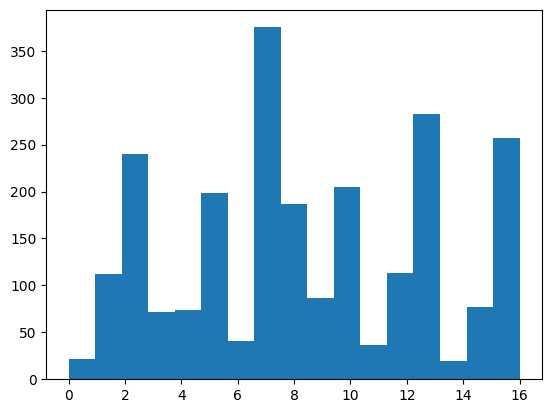

In [ ]:
# Check the data distribution
plt.hist(np.argmax(labels, axis=1), bins=17)

In [ ]:
# let's get a sample from each class
class_sample = np.argmax(labels, axis=0)
print(class_sample)

[ 13  49   9  89   2   4  73   7  15  31  14  82  23   5 270  21   0]


### Sentinel-1

The data set contains the following channels:
1) the real part of the unfiltered VH channel
2) the imaginary part of the unfiltered VH channel
3) the real part of the unfiltered VV channel
4) the imaginary part of the unfiltered VV channel
5) the intensity of the refined Lee filtered VH channel
6) the intensity of the refined Lee filtered VV channel
7) the real part of the refined Lee filtered covariance matrix off-diagonal element
8) the imaginary part of the refined Lee filtered covariance matrix off-diagonal element

Sentinel-1 shape: (2400, 32, 32, 8)


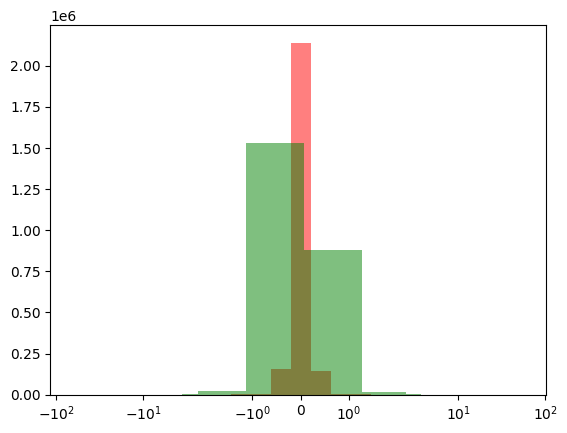

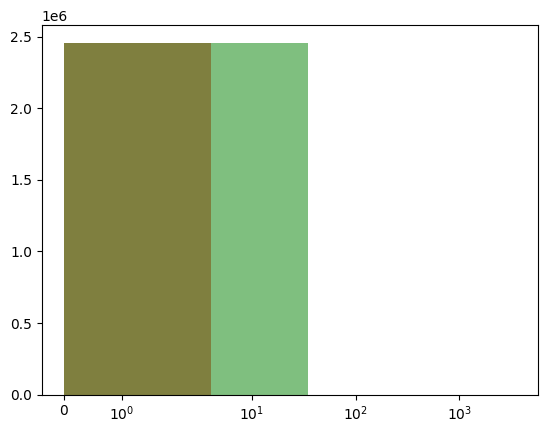

In [ ]:
# load Sentinel-1 data
sen1 = np.array(dataset['sen1'])

print("Sentinel-1 shape: " + str(sen1.shape))

plt.hist(sen1[:,:,:,0].flatten(), label="1", color="red", alpha=0.5, bins=100)
plt.hist(sen1[:,:,:,2].flatten(), label="3", color="green", alpha=0.5, bins=100)
plt.xscale('symlog')
plt.show()
plt.hist(sen1[:,:,:,4].flatten(), label="5", color="red", alpha=0.5, bins=100)
plt.hist(sen1[:,:,:,5].flatten(), label="6", color="green", alpha=0.5, bins=100)
plt.xscale('symlog')
plt.show()


<ipython-input-10-75cf38aa7d2d>:18: RuntimeWarning: invalid value encountered in log
  band1 = c4 + np.log(c1 - np.log(c6 / (c3 + 2.5 * VV)) + np.log(c6 / (c3 + 1.5 * VH)))
<ipython-input-10-75cf38aa7d2d>:20: RuntimeWarning: invalid value encountered in log
  band3 = 0.8 - np.log(c6 / (c5 - c7 * VV))
<ipython-input-10-75cf38aa7d2d>:32: RuntimeWarning: invalid value encountered in cast
  return tc.astype('uint8')


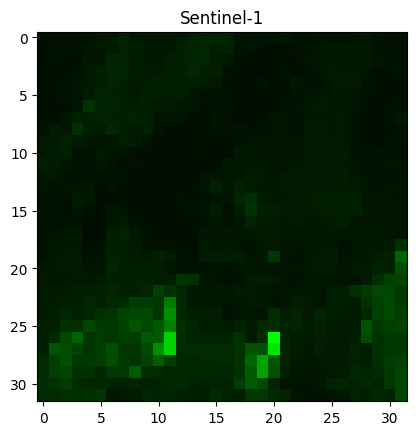

In [ ]:
def false_color(X):
    VH = X[:,:,4]
    VV = X[:,:,5]

    c1 = 10e-4;
    c2 = 0.01;
    c3 = 0.02;
    c4 = 0.03;
    c5 = 0.045;
    c6 = 0.05;
    c7 = 0.9;
    c8 = 0.25;

    # Enhanced or non-enhanced option (set to "true" if you want enhanced)
    enhanced = True;

    if (enhanced):
        band1 = c4 + np.log(c1 - np.log(c6 / (c3 + 2.5 * VV)) + np.log(c6 / (c3 + 1.5 * VH)))
        band2 = c6 + np.exp(c8 * (np.log(c2 + 2 * VV) + np.log(c3 + 7 * VH)))
        band3 = 0.8 - np.log(c6 / (c5 - c7 * VV))
    else:
        band1 = c4 + np.log(c1 - np.log(c6 / (c3 + 2 * VV)))
        band2 = c6 + np.exp(c8 * (np.log(c2 + 2 * VV) + np.log(c3 + 5 * VH)))
        band3 = 1 - np.log(c6 / (c5 - c7 * VV))

    band1 = band1 / (band1.max()/255.0)
    band2 = band2 / (band2.max()/255.0)
    band3 = band3 / (band3.max()/255.0)

    tc = np.dstack((band1, band2, band3))

    return tc.astype('uint8')

plt.imshow(false_color(sen1[class_sample[0],:,:,:]))
plt.title('Sentinel-1')

plt.show()

<ipython-input-10-75cf38aa7d2d>:18: RuntimeWarning: invalid value encountered in log
  band1 = c4 + np.log(c1 - np.log(c6 / (c3 + 2.5 * VV)) + np.log(c6 / (c3 + 1.5 * VH)))
<ipython-input-10-75cf38aa7d2d>:20: RuntimeWarning: invalid value encountered in log
  band3 = 0.8 - np.log(c6 / (c5 - c7 * VV))
<ipython-input-10-75cf38aa7d2d>:32: RuntimeWarning: invalid value encountered in cast
  return tc.astype('uint8')


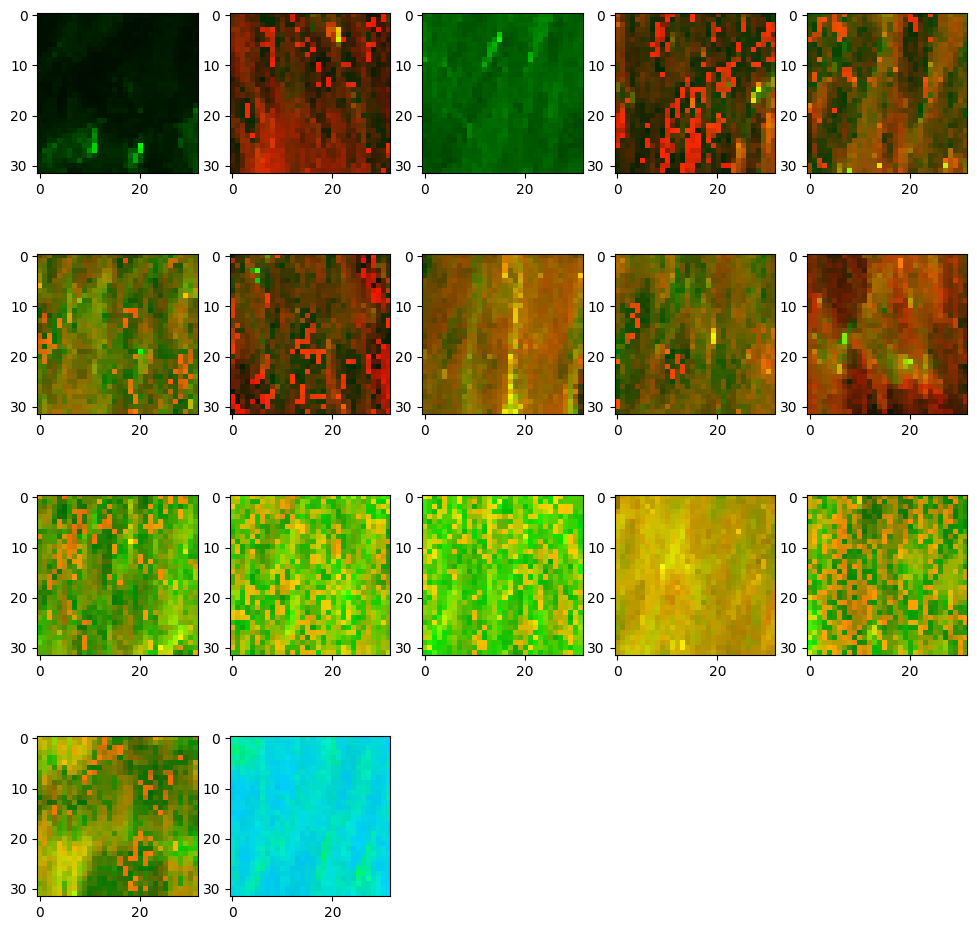

In [ ]:
fig=plt.figure(figsize=(12, 12))

for i in range(17):
    fig.add_subplot(4, 5, i+1)
    plt.imshow(false_color(sen1[class_sample[i],:,:,:]))

plt.show()

### Do it yourself

Implement the radar vegetation indexing for visualization of Sentinel-1 data (for the [algorithm](https://custom-scripts.sentinel-hub.com/custom-scripts/sentinel-1/radar_vegetation_index_code_dual_polarimetric/), please refer to Sentinel Hub), and check some results.

In [ ]:
#def calc_rvi(X):
#    VH = X[:,:,4]
#    VV = X[:,:,5]
#
#    dop = (VV/(VV+VH))
#    m = 1 - dop # dop = degree of polarization
#    radar_vegetation_index = (np.sqrt(dop))*((4*(VH))/(VV+VH))
#    radar_vegetation_index = ((4*(VH))/(VV+VH))
#
#    return radar_vegetation_index

def calc_rvi(X):
    VH = X[:, :, 4]
    VV = X[:, :, 5]

    dop = VV / (VV + VH)  # Degree of polarization
    radar_vegetation_index = (np.sqrt(dop)) * ((4 * VH) / (VV + VH))

    return radar_vegetation_index



### Sentinel-2

Sentinel-2 Bands in So2Sat LCZ 42
1) Band B2 (Blue), 10m GSD
2) Band B3 (Green), 10m GSD
3) Band B4 (Red), 10m GSD
4) Band B5, upsampled to 10m from 20m GSD
5) Band B6, upsampled to 10m from 20m GSD
6) Band B7, upsampled to 10m from 20m GSD
7) Band B8, 10m GSD
8) Band B8a, upsampled to 10m from 20m GSD
9) Band B11, upsampled to 10m from 20m GSD
10) and Band B12, upsampled to 10m from 20m GSD

Sentinel-2 shape: (2400, 32, 32, 10)


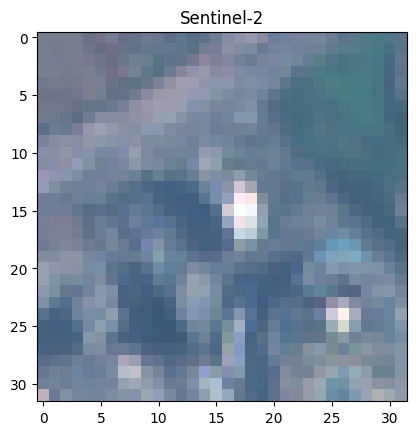

In [ ]:
# load Sentinel-2 data
sen2 = np.array(dataset['sen2'])

print("Sentinel-2 shape: " + str(sen2.shape))

def true_color(X):
    """ Define True Color Sentinel image
    The function returns the MinMax scaled RGB bands.
    Matplot convention RGB [0, 255]
    """
    blue = X[:,:,0] / (X[:,:,0].max()/255.0)
    green = X[:,:,1] / (X[:,:,1].max()/255.0)
    red = X[:,:,2] / (X[:,:,2].max()/255.0)

    tc = np.dstack((red, green, blue))

    return tc.astype('uint8')

# show one patch
plt.imshow(true_color(sen2[class_sample[0],:,:,0:3]))
plt.title('Sentinel-2')

plt.show()


### Do it yourself

The Normalized difference vegetation index (NDVI) is a simple, but effective index for quantifying green vegetation. It normalizes green leaf scattering in Near Infra-red wavelengths with chlorophyll absorption in red wavelengths.

It is defined as

$$ NDVI = Index(NIR, RED) = (NIR - RED) / (NIR + RED) $$

For Sentinel-2, NIR = B8 and RED = B4

Implement the NDVI and check some Sentinel-2 images.

In [ ]:
def calculate_ndvi(image):
    # Assuming `image` is a 3D numpy array where:
    # image[:, :, 3] corresponds to RED (B4)
    # image[:, :, 7] corresponds to NIR (B8)
    RED = image[:, :, 3]
    NIR = image[:, :, 7]

    # Calculate NDVI
    ndvi = (NIR - RED) / (NIR + RED)

    return ndvi




## 3. Machine Learning: Random Forest Classifier

Machine learning: A computer program is said to learn from experience E with respect to some task T and some performance measure P, if its performance on T, as measured by P, improves with experience E (*Tom M. Michell, 1997*).


A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

![Random Forest](random-forest.png)

In [ ]:
# The random forest expects a vector of features. Therefore,
# we concatenate all bands and pixels
number_samples = sen2.shape[0]
X = np.reshape(sen2, (number_samples, 32 * 32 * 10))

print("Post-processed Sentinel-2 data shape: ", X.shape)

# Let us split the data into train and test
TRAIN_SPLIT = int(number_samples * .8)

X_train = X[:TRAIN_SPLIT,:]
X_test = X[TRAIN_SPLIT:,:]



Post-processed Sentinel-2 data shape:  (2400, 10240)


In [ ]:
# The labels are one hot encoded, but the random forest requires
# the class number
y_train = np.argmax(labels[0:TRAIN_SPLIT,:], axis=1)
y_test = np.argmax(labels[TRAIN_SPLIT:2400,:], axis=1)

print("Post-processed train labels shape: ", y_train.shape)

Post-processed train labels shape:  (1920,)


In [ ]:
rf_classifier = RandomForestClassifier(random_state=0)

rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_pred_rf = rf_classifier.predict(X_test)

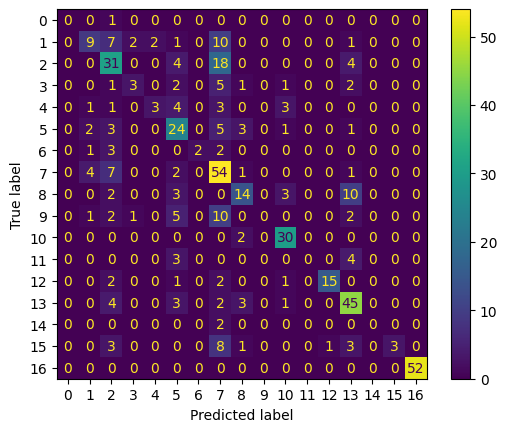

Accuracy Random Forest Classifier:  0.59375


In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
plt.show()

acc_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy Random Forest Classifier: ", acc_rf)

### Do it yourself

Train a random forest to predict the local climate zone using Sentinel-1 (or NDVI) images.

(2400, 32, 32, 8)
Post-processed Sentinel-1 data shape: (2400, 8192)
Post-processed train labels shape: (1920,)


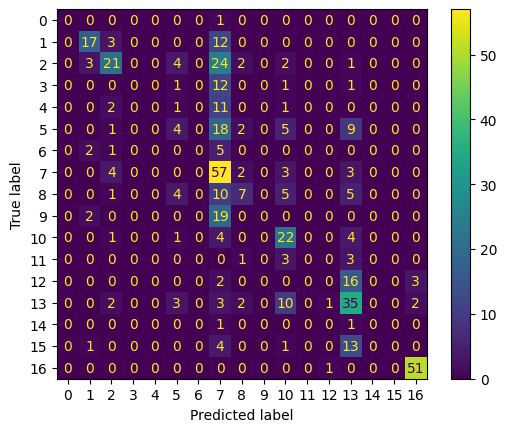

Accuracy Random Forest Classifier: 0.44583333333333336


In [ ]:
print(sen1.shape)
number_samples = sen1.shape[0]
Z = np.reshape(sen1, (number_samples, 32 * 32 * 8))

# Continue...

# Step 1: Reshape the data for the Random Forest model
number_samples = sen1.shape[0]
Z = np.reshape(sen1, (number_samples, 32 * 32 * 8))  # 假设sen1有8个频带，每个影像是32x32像素

print("Post-processed Sentinel-1 data shape:", Z.shape)

# Step 2: Split the data into train and test sets
TRAIN_SPLIT = int(number_samples * 0.8)
Z_train = Z[:TRAIN_SPLIT, :]
Z_test = Z[TRAIN_SPLIT:, :]

# Step 3: Prepare the labels
# Assuming `labels` is a one-hot encoded array, we need to convert it to class labels
y_train = np.argmax(labels[:TRAIN_SPLIT, :], axis=1)
y_test = np.argmax(labels[TRAIN_SPLIT:, :], axis=1)

print("Post-processed train labels shape:", y_train.shape)

# Step 4: Train the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

rf_classifier = RandomForestClassifier(random_state=0)
rf_classifier.fit(Z_train, y_train)

# Step 5: Predict and evaluate the model
y_pred_rf = rf_classifier.predict(Z_test)

# Display the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
plt.show()

# Calculate accuracy
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy Random Forest Classifier:", acc_rf)

## 4. Deep Learning

![Deep Learning](deep-learning.png)

In [ ]:
Z_train = sen2[:TRAIN_SPLIT,:,:,:]
Z_test = sen2[TRAIN_SPLIT:,:,:,:]

print("Train shape: ", Z_train.shape, y_train.shape)

In [ ]:
simple_model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32, 10)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(17, activation='softmax')
])

simple_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
simple_model.fit(Z_train, y_train, epochs=5)

In [ ]:
y_pred_dl_p = simple_model.predict(Z_test)

print("Prediction example: ", y_pred_dl_p[0,:], " Class: ", np.argmax(y_pred_dl_p[0,:]))

In [ ]:
y_pred_dl = np.argmax(y_pred_dl_p, axis=1)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dl)
plt.show()

acc_dl = accuracy_score(y_test, y_pred_dl)
print("Accuracy Simple Deep Learning model: ", acc_dl)

simple_model.fit(Z_train, y_train, epochs=5)

### Do it yourself

Propose your own *simple* neural network model to predict the local climate zone.

In [ ]:
# You may use the following code to get started...
simple_model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32, 10)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(17, activation='softmax')
])

simple_model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
simple_model_2.fit(Z_train, y_train, epochs=5)
y_pred_dl_p_2 = simple_model_2.predict(Z_test)

y_pred_dl_2 = np.argmax(y_pred_dl_p_2, axis=1)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dl_2)
plt.show()

acc_dl_2 = accuracy_score(y_test, y_pred_dl_2)
print("Accuracy Simple Deep Learning model DIY: ", acc_dl_2)

### Residual Network: ResNet

A residual neural network (ResNet) is an artificial neural network that imitate the pyramidal cells in the cerebral cortex. Particularly, the ResNet architecture consists of skip connections or shortcuts to jump over some layers. Typical ResNet models are implemented with double- or triple- layer skips that contain nonlinearities (ReLU) and batch normalization in between. These *cells* are known as *residual block*.

![Residual Block](residual-block.png)

ResNets connection weights are easier to optimize (especially for gradient descent-based optimizers) because the short cuts contribute to alleviate the vanishing gradient problem.

In practice, the degradation problem (i.e., increasing the depth of a network leads to a decrease in its performance) is mitigated, and the observed performance (when the number of hidden layers increase) is much closer to the theoretical one.

![Residual Network](residual-network.png)

Let us design a *deeper* model, based on ResNet... We will use Keras [implementation](https://github.com/keras-team/keras-applications/blob/master/keras_applications/resnet50.py) as our basis

In [6]:
def identity_block(
    input_tensor,
    kernel_size,
    filters,
    stage,
    block):
    """The identity block is the block that has no conv layer at shortcut.
    # Arguments
        input_tensor: input tensor
        kernel_size: default 3, the kernel size of
            middle conv layer at main path
        filters: list of integers, the filters of 3 conv layer at main path
        stage: integer, current stage label, used for generating layer names
        block: 'a','b'..., current block label, used for generating layer names
    # Returns
        Output tensor for the block.
    """
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    # Retrieve Filters
    F1, F2, F3 = filters

    # First component of main path
    x = tf.keras.layers.Conv2D(
        filters=F1,
        kernel_size=(1, 1),
        strides=(1,1),
        padding='valid',
        name=conv_name_base + '2a',
        kernel_initializer=tf.keras.initializers.GlorotUniform(seed=0))(input_tensor)

    x = tf.keras.layers.BatchNormalization(
        axis=3,
        name=bn_name_base + '2a')(x)
    x = tf.keras.layers.Activation('relu')(x)

    # Second component of main path
    x = tf.keras.layers.Conv2D(
        filters=F2,
        kernel_size=kernel_size,
        strides=(1,1),
        padding='same',
        name=conv_name_base + '2b',
        kernel_initializer=tf.keras.initializers.GlorotUniform(seed=0))(x)
    x = tf.keras.layers.BatchNormalization(
        axis=3,
        name=bn_name_base + '2b')(x)
    x = tf.keras.layers.Activation('relu')(x)

    # Third component of main path
    x = tf.keras.layers.Conv2D(
        filters=F3,
        kernel_size=(1, 1),
        strides=(1,1),
        padding='valid',
        name=conv_name_base + '2c',
        kernel_initializer=tf.keras.initializers.GlorotUniform(seed=0))(x)
    x = tf.keras.layers.BatchNormalization(axis = 3, name = bn_name_base + '2c')(x)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    x = tf.keras.layers.Add()([x, input_tensor])
    x = tf.keras.layers.Activation('relu')(x)

    return x

In [7]:
def convolutional_block(
    input_tensor,
    kernel_size,
    filters,
    stage,
    block,
    strides=(2, 2)):
    """A block that has a conv layer at shortcut.
    # Arguments
        input_tensor: input tensor
        kernel_size: default 3, the kernel size of
            middle conv layer at main path
        filters: list of integers, the filters of 3 conv layer at main path
        stage: integer, current stage label, used for generating layer names
        block: 'a','b'..., current block label, used for generating layer names
        strides: Strides for the first conv layer in the block.
    # Returns
        Output tensor for the block.
    """
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    # Retrieve Filters
    F1, F2, F3 = filters

    # First component of main path
    x = tf.keras.layers.Conv2D(
        F1,
        (1, 1),
        strides = strides,
        name = conv_name_base + '2a',
        kernel_initializer = tf.keras.initializers.GlorotUniform(seed=0))(input_tensor)

    x = tf.keras.layers.BatchNormalization(
        axis = 3,
        name = bn_name_base + '2a')(x)

    x = tf.keras.layers.Activation('relu')(x)

    x = tf.keras.layers.Conv2D(
        filters = F2,
        kernel_size = kernel_size,
        strides = (1,1),
        padding = 'same',
        name = conv_name_base + '2b',
        kernel_initializer = tf.keras.initializers.GlorotUniform(seed=0))(x)

    x = tf.keras.layers.BatchNormalization(
        axis = 3,
        name = bn_name_base + '2b')(x)

    x = tf.keras.layers.Activation('relu')(x)

    x = tf.keras.layers.Conv2D(
        filters = F3,
        kernel_size = (1, 1),
        strides = (1,1),
        padding = 'valid',
        name = conv_name_base + '2c',
        kernel_initializer = tf.keras.initializers.GlorotUniform(seed=0))(x)

    x = tf.keras.layers.BatchNormalization(axis = 3, name = bn_name_base + '2c')(x)

    tensor_shortcut = tf.keras.layers.Conv2D(
        filters = F3,
        kernel_size = (1, 1),
        strides = strides,
        padding = 'valid',
        name = conv_name_base + '1',
        kernel_initializer = tf.keras.initializers.GlorotUniform(seed=0))(input_tensor)
    tensor_shortcut = tf.keras.layers.BatchNormalization(
        axis = 3,
        name = bn_name_base + '1')(tensor_shortcut)

    x = tf.keras.layers.Add()([x, tensor_shortcut])
    x = tf.keras.layers.Activation('relu')(x)

    return x

In [57]:
def ResNet50(input_shape=(7, 5, 5), classes=17):
    # Define the input of the model
    M_input = tf.keras.layers.Input(input_shape)
    print("Input shape", M_input.shape)

    # Add zero padding to the patch
    M = tf.keras.layers.ZeroPadding2D(padding=(3, 3))(M_input)

    # Stage 1
    M = tf.keras.layers.Conv2D(
        filters=64,
        kernel_size=(7, 7),
        strides=(2, 2),
        name='conv1',
        kernel_initializer=tf.keras.initializers.GlorotUniform(seed=0))(M)
    M = tf.keras.layers.BatchNormalization(
        axis=3,
        name='bn_conv1')(M)
    M = tf.keras.layers.Activation('relu')(M)
    M = tf.keras.layers.MaxPool2D(
        pool_size=(3, 3),
        strides=(2, 2))(M)
    print("Stage 1 shape", M.shape)

    # Stage 2
    M = convolutional_block(
        M,
        kernel_size=3,
        filters=[64, 64, 256],
        stage=2,
        block='a',
        strides=(1, 1))
    M = identity_block(M, 3, [64, 64, 256], stage=2, block='b')
    M = identity_block(M, 3, [64, 64, 256], stage=2, block='c')
    print("Stage 2 shape", M.shape)

    # Stage 3
    M = convolutional_block(
        M,
        kernel_size=3,
        filters=[128, 128, 512],
        stage = 3,
        block='a',
        strides=(1, 1))
    M = identity_block(M, 3, [128, 128, 512], stage=3, block='b')
    M = identity_block(M, 3, [128, 128, 512], stage=3, block='c')
    M = identity_block(M, 3, [128, 128, 512], stage=3, block='d')
    print("Stage 3 shape", M.shape)

    # Stage 4
    M = convolutional_block(
        M,
        kernel_size=3,
        filters=[256, 256, 1024],
        stage = 4,
        block='a',
        strides=(2, 2))
    M = identity_block(M, 3, [256, 256, 1024], stage=4, block='b')
    M = identity_block(M, 3, [256, 256, 1024], stage=4, block='c')
    M = identity_block(M, 3, [256, 256, 1024], stage=4, block='d')
    M = identity_block(M, 3, [256, 256, 1024], stage=4, block='e')
    M = identity_block(M, 3, [256, 256, 1024], stage=4, block='f')
    print("Stage 4 shape", M.shape)

    # Stage 5
    M = convolutional_block(
        M,
        kernel_size=3,
        filters=[512, 512, 2048],
        stage = 5,
        block='a',
        strides=(2, 2))
    M = identity_block(M, 3, [512, 512, 2048], stage=5, block='b')
    M = identity_block(M, 3, [512, 512, 2048], stage=5, block='c')
    print("Stage 5 shape", M.shape)

    # AVGPOOL
    M = tf.keras.layers.AveragePooling2D(pool_size=(1, 1), name="avg_pool")(M)
    print("Avg pool shape", M.shape)

    # output layer
    M = tf.keras.layers.Flatten()(M)
    M = tf.keras.layers.Dense(
        classes,
        activation='softmax',
        name='fc' + str(classes),
        kernel_initializer = tf.keras.initializers.GlorotUniform)(M)
    print("Output shape", M.shape)

    # Create model
    model = tf.keras.Model(inputs = M_input, outputs = M, name='ResNet50')
    return model

In [58]:
model_rn = ResNet50(input_shape=(7, 5, 5), classes=17)

model_rn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

# Uncomment the following line to check the full model
model_rn.summary()

Input shape (None, 7, 5, 5)
Stage 1 shape (None, 1, 1, 64)
Stage 2 shape (None, 1, 1, 256)
Stage 3 shape (None, 1, 1, 512)
Stage 4 shape (None, 1, 1, 1024)
Stage 5 shape (None, 1, 1, 2048)
Avg pool shape (None, 1, 1, 2048)
Output shape (None, 17)


Model: "ResNet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 7, 5, 5)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_5    │ (None, 13, 11, 5) │          0 │ input_layer_7[0]… │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1 (Conv2D)      │ (None, 4, 3, 64)  │     15,744 │ zero_padding2d_5… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_conv1            │ (None, 4, 3, 64)  │        256 │ conv1[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_251      │ (None, 4, 3, 64)  │          0 │ bn_conv1[0][0]    │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 1, 1, 64)  │          0 │ activation_251[0… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res2a_branch2a      │ (None, 1, 1, 64)  │      4,160 │ max_pooling2d_5[… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn2a_branch2a       │ (None, 1, 1, 64)  │        256 │ res2a_branch2a[0… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_252      │ (None, 1, 1, 64)  │          0 │ bn2a_branch2a[0]… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res2a_branch2b      │ (None, 1, 1, 64)  │     36,928 │ activation_252[0… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn2a_branch2b       │ (None, 1, 1, 64)  │        256 │ res2a_branch2b[0… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_253      │ (None, 1, 1, 64)  │          0 │ bn2a_branch2b[0]… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res2a_branch2c      │ (None, 1, 1, 256) │     16,640 │ activation_253[0… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res2a_branch1       │ (None, 1, 1, 256) │     16,640 │ max_pooling2d_5[… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn2a_branch2c       │ (None, 1, 1, 256) │      1,024 │ res2a_branch2c[0… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn2a_branch1        │ (None, 1, 1, 256) │      1,024 │ res2a_branch1[0]… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_80 (Add)        │ (None, 1, 1, 256) │          0 │ bn2a_branch2c[0]… │
│                     │                   │            │ bn2a_branch1[0][

 Total params: 23,628,817 (90.14 MB)

 Trainable params: 23,575,697 (89.93 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [60]:

# Assuming labels is your array of labels
num_classes = 17  # Set this to the correct number of classes in your dataset

# Check if any labels are out of range
invalid_labels = np.where(labels >= num_classes)[0]
if len(invalid_labels) > 0:
    print(f"Invalid labels found at indices: {invalid_labels}")
    print(f"Invalid label values: {labels[invalid_labels]}")
    # Correct the invalid labels (this is just an example, adjust as needed)
    labels[invalid_labels] = num_classes - 1  # Set invalid labels to the maximum valid label

# Now you can fit the model
model_rn.fit(arr_4d, labels, epochs=5)

Invalid labels found at indices: [   28    31    43 ... 26223 26224 26257]
Invalid label values: [17 17 18 ... 17 17 17]
Epoch 1/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 299s 364ms/step - accuracy: 0.1315 - loss: 3.5264
Epoch 2/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 309s 376ms/step - accuracy: 0.1442 - loss: 3.0886
Epoch 3/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 307s 374ms/step - accuracy: 0.1442 - loss: 3.1153
Epoch 4/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 303s 369ms/step - accuracy: 0.1405 - loss: 3.0446
Epoch 5/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 307s 374ms/step - accuracy: 0.1525 - loss: 2.9389


In [62]:
number_samples = arr_4d.shape[0]
TRAIN_SPLIT = int(number_samples * .8)

X_train = X[:TRAIN_SPLIT,:]
X_test = X[TRAIN_SPLIT:,:]

In [68]:
# The labels are one hot encoded, but the random forest requires
# the class number
#y_train = np.argmax(labels[:TRAIN_SPLIT], axis=1)
y_test = np.argmax(labels[TRAIN_SPLIT:])

print("Post-processed train labels shape: ", y_test.shape)

Post-processed train labels shape:  ()


In [69]:
y_pred_rn_p = model_rn.predict(X_test)

y_pred_rn = np.argmax(y_pred_rn_p, axis=1)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rn)
plt.show()

acc_rn = accuracy_score(y_test, y_pred_rn)
print("Accuracy ResNet-50 model: ", acc_rn)

165/165 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step


ValueError: Mix type of y not allowed, got types {'multiclass', 'unknown'}

### Do it yourself

Play around with the ResNet50 model, e.g., by modifying the training process, and/or changing the training budget (number of epochs)

In [ ]:
model_rn_diy = ResNet50(input_shape=(32, 32, 10), classes=17)

# let's define a schedule to lower the learning rate
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=1000,
    decay_rate=0.9)

model_rn_diy.compile(
    # If you want to learn more about the Adam algorithm,
    # visit https://www.tensorflow.org/versions/r2.6/api_docs/python/tf/keras/optimizers/Adam
    # or check Kingma et al. (2014) paper http://arxiv.org/abs/1412.6980
    optimizer=tf.keras.optimizers.Adam(
        learning_rate=lr_schedule, # 0.001 is the standard value
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-07,
        amsgrad=False),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

model_rn_diy.fit(Z_train, y_train, epochs=5)

y_pred_rn_p_diy = model_rn_diy.predict(Z_test)

y_pred_rn_diy = np.argmax(y_pred_rn_p_diy, axis=1)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rn_diy)
plt.show()

acc_rn_diy = accuracy_score(y_test, y_pred_rn_diy)
print("Accuracy ResNet-50 model: ", acc_rn_diy)

How about using Sentinel-1 and -2 at the same time? Check the code, and try to improve the performance using what you have learnt

In [ ]:
fusion_train = np.array(
    [np.dstack((s1, s2)) for s1, s2 in zip(sen1[:TRAIN_SPLIT,:,:,:], sen2[:TRAIN_SPLIT,:,:,:])])
A
fusion_test = np.array(
    [np.dstack((s1, s2)) for s1, s2 in zip(sen1[TRAIN_SPLIT:,:,:,:], sen2[TRAIN_SPLIT:,:,:,:])])

print("Original shape: ", sen1.shape, sen2.shape)
print("Train shape: ", fusion_train.shape, y_train.shape)
print("Test shape: ", fusion_test.shape, y_test.shape)

model_rn_fusion = ResNet50(input_shape=(32, 32, 18), classes=17)

model_rn_fusion.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

model_rn_fusion.fit(fusion_train, y_train, epochs=5)

y_pred_rn_fusion_p = model_rn_fusion.predict(fusion_test)

y_pred_rn_fusion = np.argmax(y_pred_rn_fusion_p, axis=1)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rn_fusion)
plt.show()

acc_rn_fusion = accuracy_score(y_test, y_pred_rn_fusion)
print("Accuracy ResNet-50 model using Sentinel-1 and 2: ", acc_rn_fusion)

In [ ]:
# TODO: define your model!

## References

1. He, K., Zhang, X., Ren, S. and Sun, J., 2016. Deep residual learning for image recognition. In Proceedings of the IEEE conference on computer vision and pattern recognition (CVPR) (pp. 770-778).
2. LeCun, Y., Bengio, Y. and Hinton, G., 2015. Deep learning. nature, 521(7553), pp.436-444.
3. McCarthy, J., 2007. What is artificial intelligence?
4. Mohri, M., Rostamizadeh, A. and Talwalkar, A., 2018. Foundations of machine learning. MIT press.
5. Zhu, X.X., Hu, J., Qiu, C., Shi, Y., Kang, J., Mou, L., Bagheri, H., Haberle, M., Hua, Y., Huang, R. and Hughes, L., 2020. So2Sat LCZ42: a benchmark data set for the classification of global local climate zones. IEEE Geoscience and Remote Sensing Magazine, 8(3), pp.76-89.
6. Zhu, X.X., Tuia, D., Mou, L., Xia, G.S., Zhang, L., Xu, F. and Fraundorfer, F., 2017. Deep learning in remote sensing: A comprehensive review and list of resources. IEEE Geoscience and Remote Sensing Magazine, 5(4), pp.8-36.